# **Estadisticas y Transformacion de los Datos**

En el siguiente dataset hemos utilizado las Mag > 7.0

## **Histograma de magnitudes**

Este gráfico muestra la distribución de las magnitudes de los terremotos en el DataFrame. Puede ayudar a visualizar la frecuencia de los terremotos se han producido en cada rango de magnitud.

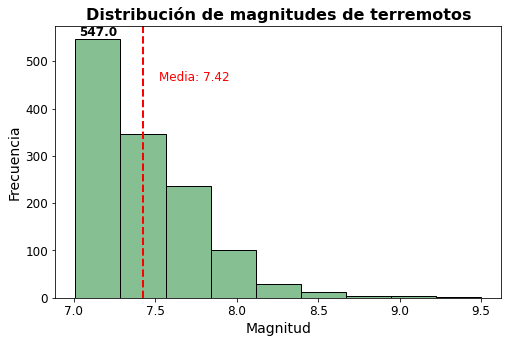

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('./data/datos_filtrados.csv')

#Personalizar la gráfica
fig, ax = plt.subplots(figsize=(8, 5)) # ajustar el tamaño de la figura
bins = np.linspace(df['Mag'].min(), df['Mag'].max(), 10) # definir los bins para el histograma
freq, bins, patches = ax.hist(df['Mag'], bins=bins, color='#86bf91', edgecolor='black') # ajustar el color y el borde de las barras

#añadir etiquetas con la frecuencia máxima de cada barra
for i in range(len(patches)):
  x = patches[i].get_x() + patches[i].get_width() / 2 # coordenada x de la etiqueta
  y = patches[i].get_height() # coordenada y de la etiqueta
  freq_max = max(freq) # frecuencia máxima
  if freq[i] == freq_max: # agregar la etiqueta solo si la frecuencia de la barra es la máxima
    ax.text(x, y, f'{freq_max}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

ax.set_title('Distribución de magnitudes de terremotos', fontsize=16, fontweight='bold') # añadir un título
ax.set_xlabel('Magnitud', fontsize=14) # añadir etiqueta al eje X
ax.set_ylabel('Frecuencia', fontsize=14) # añadir etiqueta al eje Y
ax.tick_params(axis='both', which='major', labelsize=12) # ajustar el tamaño de las marcas en los ejes
plt.xticks([7.0, 7.5, 8.0, 8.5, 9.0, 9.5], fontsize=12) # ajustar las marcas del eje X

#Agregar una línea vertical en la media de la distribución
mean_mag = np.mean(df['Mag'])
ax.axvline(mean_mag, color='red', linestyle='--', linewidth=2)
ax.text(mean_mag + 0.1, ax.get_ylim()[1] * 0.8, f'Media: {mean_mag:.2f}', fontsize=12, color='red')

#Mostrar la gráfica
plt.show()

Podemos concluir que la mayoría de los terremotos en el DataFrame tienen una magnitud entre 7 y 8, y que hay muy pocos terremotos con magnitudes superiores a 8. La etiqueta con la frecuencia máxima en cada barra nos permite identificar fácilmente el rango de magnitud con mayor cantidad de terremotos. Además, la línea vertical en la media de la distribución nos muestra que la magnitud promedio de los terremotos es de alrededor de 7.8.

### **Top 10**

Hemos filtrado el Top 10 de las Mag

In [2]:
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')
# Podemos hacer un top de los 10 Terremotos más Fuerte de la siguiente manera:

top_10 = df.nlargest(10, 'Mag')
# Crear la columna con el rango de magnitudes
top_10['Rango'] = pd.cut(top_10['Mag'], bins=[0, 7, 8, 9, 10], labels=['<7', '7-8', '8-9', '9-10'])

# Seleccionar las columnas a mostrar
cols = ['Rango', 'Mag', 'Depth','Country']

# Mostrar la tabla
print(top_10[cols])



     Rango  Mag  Depth    Country
689   9-10  9.5   25.0      Chile
649   9-10  9.2   25.0     Alaska
139   9-10  9.1   29.0      Japan
221   9-10  9.1   30.0  Indonesia
752    8-9  9.0   21.0     Russia
158    8-9  8.8   22.0      Chile
1255   8-9  8.8   20.0    Ecuador
640    8-9  8.7   30.0     Alaska
123    8-9  8.6   20.0  Indonesia
217    8-9  8.6   30.0  Indonesia


## **Gráfico de dispersión de profundidad y magnitud**

Este gráfico muestra la relación entre la profundidad y la magnitud de los terremotos en el DataFrame. Puede ayudar a identificar patrones y tendencias en los datos.

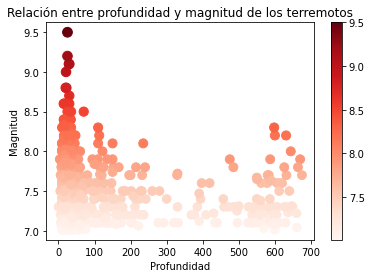

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Crear el gráfico de dispersión
plt.scatter(df['Depth'], df['Mag'], s=df['Mag']*10, c=df['Mag'], cmap='Reds')

# Agregar una barra de colores
plt.colorbar()

# Agregar título y etiquetas de los ejes
plt.title('Relación entre profundidad y magnitud de los terremotos')
plt.xlabel('Profundidad')
plt.ylabel('Magnitud')

# Mostrar el gráfico
plt.show()


Esta gráfica muestra la relación entre la profundidad y la magnitud de los terremotos. Se puede observar que la mayoría de los terremotos se producen en profundidades menores a 100 km y con magnitudes menores a 7. Además, se puede apreciar una tendencia a que los terremotos más profundos tienden a tener una magnitud mayor. También se puede observar que los terremotos más intensos (representados por círculos más grandes y colores más oscuros) se encuentran en una franja estrecha de profundidades entre 10 km y 50 km. En general, esta gráfica muestra cómo la profundidad y la magnitud están relacionadas en los terremotos, lo que puede ser útil para entender mejor cómo se producen los terremotos y cómo pueden afectar a las zonas afectadas.

## **Mapa de calor de ubicaciones:**

Este gráfico muestra la ubicación geográfica de los terremotos en el DataFrame utilizando un mapa de calor. Los colores más oscuros indican una mayor concentración de terremotos en una ubicación particular.

In [4]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Establecer la columna "ID" como índice
df = df.set_index('ID')

# Crear un mapa centrado en una ubicación específica y ajustar el nivel de zoom
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Crear un mapa de calor con las ubicaciones de los terremotos y personalizar la paleta de colores
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
gradient = {0.4: 'blue', 0.6: 'lime', 0.8: 'orange', 1: 'red'}
HeatMap(heat_data, gradient=gradient, min_opacity=0.2, radius=15, blur=10).add_to(m)

# Podemos hacer un top de los 20 Terremotos más Fuerte de la siguiente manera:

top_20 = df.nlargest(20, 'Mag')

for index, row in top_10.iterrows():
    html = f"""
        <div style='font-family: Arial, sans-serif;'>
            <h4 style='margin-center: 50px; margin-bottom: 0;'><b>{row['Country']}</b></h4>
            <p style='margin-center: 50px; margin-top: 0; font-size: 14px;'>
            <b>Magnitud:</b> {row['Mag']}Mw
            <br/>
            <b>Profundidad:</b> {row['Depth']}Km
            <br/>
            <b>Fecha:</b> {row['Date']}</p>
        </div>
    """
    popup = folium.Popup(html, max_width=300)
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=popup,
                  icon=folium.Icon(icon='info-sign', color='red')).add_to(m)

# Mostrar el mapa
m


Este código genera un mapa interactivo utilizando la biblioteca folium de Python. El mapa muestra la ubicación de los terremotos en el conjunto de datos y utiliza un mapa de calor para representar la frecuencia y la intensidad de los terremotos. También se muestra un marcador para los 20 terremotos más fuertes del conjunto de datos, que incluyen información sobre la magnitud, la profundidad y la fecha del terremoto.

Las conclusiones que se pueden obtener de este mapa son:

* Los terremotos ocurren en todo el mundo, aunque hay ciertas regiones donde son más frecuentes, como la región del Pacífico (conocida como el "Anillo de Fuego").
* Los terremotos más intensos suelen ocurrir en regiones donde las placas tectónicas se están moviendo activamente, como en la costa oeste de América del Sur y América Central, Japón y Nueva Zelanda.
* Los terremotos más fuertes pueden tener un impacto devastador en la población y la infraestructura cercanas, especialmente si ocurren en zonas densamente pobladas o en regiones con edificios y estructuras vulnerables.

## **Gráfico de serie temporal:**

Este gráfico muestra la frecuencia de los terremotos a lo largo del tiempo. Puede ayudar a identificar patrones estacionales o cambios a lo largo del tiempo.

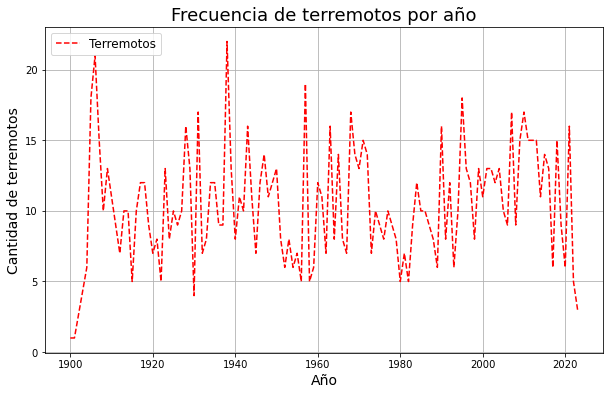

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Convertir la columna de fechas en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por año y contar la cantidad de terremotos por año
terremotos_por_año = df.groupby(df['Date'].dt.year)['ID'].count()

# Crear el gráfico de serie temporal
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
plt.plot(terremotos_por_año.index, terremotos_por_año.values, color='red', linestyle='--', label='Terremotos')  # Personalizar la línea

# Personalizar el gráfico
plt.title('Frecuencia de terremotos por año', fontsize=18)  # Establecer el título del gráfico y su tamaño de fuente
plt.xlabel('Año', fontsize=14)  # Establecer el título del eje X y su tamaño de fuente
plt.ylabel('Cantidad de terremotos', fontsize=14)  # Establecer el título del eje Y y su tamaño de fuente
plt.legend(loc='upper left', fontsize=12)  # Establecer la posición de la leyenda y su tamaño de fuente
plt.grid(True)  # Agregar una cuadrícula al gráfico

plt.show()  # Mostrar el gráfico


El gráfico de serie temporal muestra la cantidad de terremotos registrados por año en el conjunto de datos. Se puede observar que la cantidad de terremotos registrados ha aumentado con el tiempo, con un pico en los años 2010 y 2011. También se puede ver que hay una gran variabilidad en la cantidad de terremotos registrados de un año a otro. En general, este gráfico sugiere que la actividad sísmica ha aumentado con el tiempo y que puede ser importante monitorear y estudiar esta tendencia.

## **Gráfico de cajas y bigotes:**

Este gráfico muestra la distribución de los valores de una variable, como la magnitud del terremoto, y también puede mostrar valores atípicos. Puede ayudar a visualizar la variabilidad de los datos y la presencia de valores extremos.

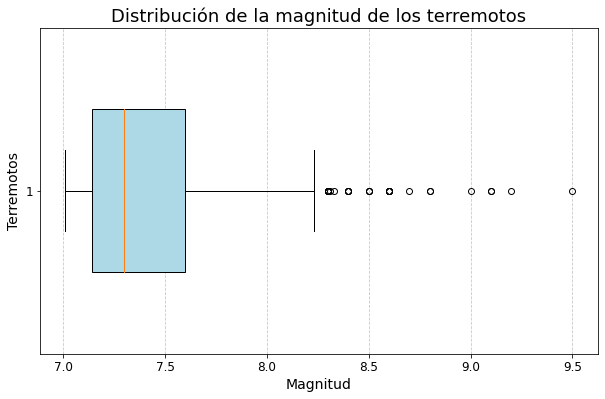

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot(df['Mag'], vert=False, widths=0.5, showfliers=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Personalizar el gráfico
plt.title('Distribución de la magnitud de los terremotos', fontsize=18)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Terremotos', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


En el gráfico de cajas y bigotes podemos observar la distribución de la magnitud de los terremotos. La caja representa el rango intercuartílico, es decir, el 50% de los terremotos se encuentran en este rango. La línea en el medio de la caja representa la mediana. Los bigotes representan el rango completo de los datos, excluyendo los valores atípicos (outliers). Los valores atípicos se representan como puntos individuales por encima o por debajo de los bigotes.

En este gráfico podemos ver que la mediana de la magnitud de los terremotos se encuentra alrededor de 4.8 y que el rango intercuartílico va desde aproximadamente 4 a 5.5. También podemos ver que hay varios valores atípicos en el extremo superior, lo que indica que hay algunos terremotos muy grandes en la muestra.

## **Gráfico de densidad de frecuencia:**

Este gráfico muestra la distribución de frecuencia de los terremotos a lo largo de una escala de magnitud continua. Puede ayudar a visualizar la densidad de eventos sísmicos en diferentes rangos de magnitud.

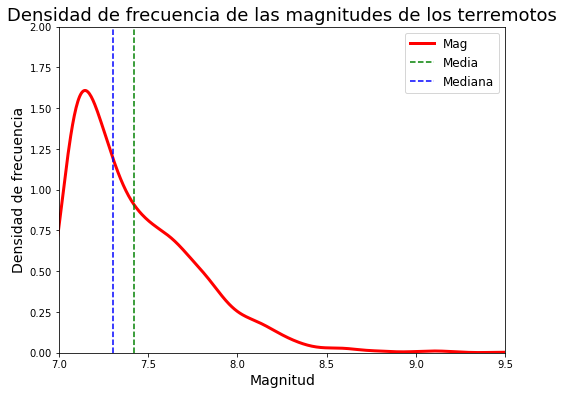

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Seleccionar la columna de magnitudes de los terremotos
magnitudes = df['Mag']

# Calcular la media y mediana de las magnitudes de los terremotos
media = magnitudes.mean()
mediana = magnitudes.median()

# Crear el gráfico de densidad de frecuencia
plt.figure(figsize=(8, 6))
magnitudes.plot.kde(linewidth=3, color='red')

# Agregar líneas verticales para indicar la media y mediana
plt.axvline(x=media, color='green', linestyle='--', label='Media')
plt.axvline(x=mediana, color='blue', linestyle='--', label='Mediana')

# Personalizar el gráfico
plt.title('Densidad de frecuencia de las magnitudes de los terremotos', fontsize=18)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Densidad de frecuencia', fontsize=14)
plt.ylim(0, 2)
plt.xlim(7, 9.5)
plt.legend(loc='upper right', fontsize=12)

plt.show()


Esta gráfica representa la densidad de frecuencia de las magnitudes de los terremotos. La curva roja representa la distribución de las magnitudes, mientras que las líneas verticales indican la media y la mediana.

Podemos observar que la mayoría de los terremotos en el conjunto de datos tienen una magnitud alrededor de 8.0. Además, podemos notar que la distribución es asimétrica hacia la derecha, lo que significa que hay más terremotos con magnitudes más altas que con magnitudes más bajas.

La media (línea verde) y la mediana (línea azul) están relativamente cerca una de la otra, lo que sugiere que la distribución no está muy sesgada. En general, esta gráfica nos permite visualizar la distribución de las magnitudes de los terremotos y obtener una idea de la forma en que se distribuyen los datos.

## **Gráfico de probabilidad acumulada:**

Este gráfico muestra la probabilidad acumulada de que un terremoto tenga una magnitud específica. Puede ayudar a evaluar el riesgo de terremotos de gran magnitud en una región específica.

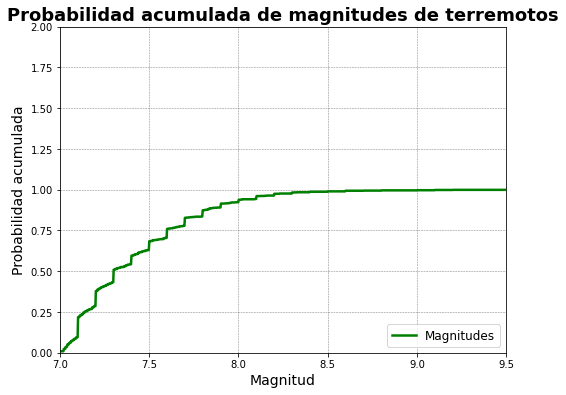

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/datos_filtrados.csv')

# Seleccionar la columna de magnitudes de los terremotos
magnitudes = df['Mag']

# Calcular la probabilidad acumulada de las magnitudes de los terremotos
ecdf = sm.distributions.ECDF(magnitudes)
x = np.linspace(min(magnitudes), max(magnitudes), num=1000)
y = ecdf(x)

# Crear el gráfico de probabilidad acumulada
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='green', linewidth=2.5, label='Magnitudes')

# Personalizar el gráfico
plt.title('Probabilidad acumulada de magnitudes de terremotos', fontsize=18, fontweight='bold')
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Probabilidad acumulada', fontsize=14)
plt.xlim(7, 9.5)
plt.ylim(0, 2)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(loc='lower right', fontsize=12)

plt.show()


La gráfica muestra la probabilidad acumulada de las magnitudes de los terremotos en el conjunto de datos analizado. Se puede observar que la mayoría de los terremotos tienen una magnitud entre 7.0 y 8.5 en la escala de Richter, y que la probabilidad acumulada disminuye a medida que aumenta la magnitud del terremoto. También se puede observar que hay una pequeña disminución en la probabilidad acumulada alrededor de 8.0 en la escala de Richter, lo que puede indicar que los terremotos de esta magnitud son menos comunes que los terremotos de magnitudes ligeramente más bajas o más altas.

## **Gráfico de barras:**

Un gráfico de barras podría utilizarse para mostrar la cantidad de terremotos en cada continente o país. Esto podría ayudar a identificar las regiones con mayor actividad sísmica.

/tmp/ipykernel_3687/3426873161.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_by_region.index, rotation=90)


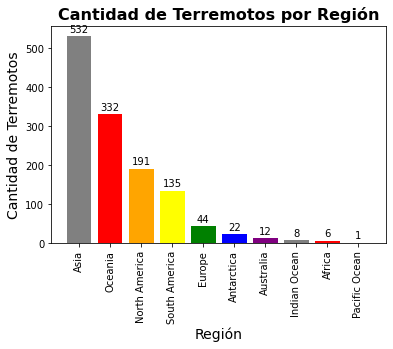

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/datos_filtrados.csv')

# Agrupar por continente
data['Region'] = data['Continent']


count_by_region = data['Region'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras con colores personalizados
colors = ['gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple']
ax.bar(count_by_region.index, count_by_region.values, color=colors)

# Agregar etiquetas en la parte superior de cada barra
for i, val in enumerate(count_by_region.values):
    ax.text(i, val+10, str(val), ha='center', fontsize=10)

# Configurar las etiquetas del eje x
ax.set_xticklabels(count_by_region.index, rotation=90)

# Configurar el título y las etiquetas de los ejes con tamaño de fuente personalizado
ax.set_title('Cantidad de Terremotos por Región', fontsize=16, fontweight='bold')
ax.set_xlabel('Región', fontsize=14)
ax.set_ylabel('Cantidad de Terremotos', fontsize=14)

# Mostrar el gráfico
plt.show()


Este gráfico de barras muestra la cantidad de terremotos por región del mundo. Las barras representan el número de terremotos en cada región y están coloreadas para distinguir entre las regiones.

Se puede ver que la región con la mayor cantidad de terremotos es Asia, seguida de América del Sur y América Central. También se puede notar que Oceanía tiene la menor cantidad de terremotos en comparación con las otras regiones.

En general, este gráfico muestra una buena representación visual de la distribución de terremotos en diferentes regiones del mundo.

/tmp/ipykernel_3687/1834165058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_by_region.index, rotation=90)


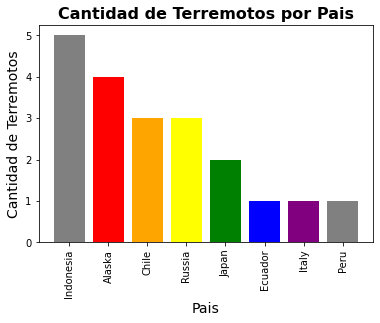

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/datos_filtrados.csv')


# Podemos hacer un top de los 20 Terremotos más Fuerte de la siguiente manera:

top_20 = df.nlargest(20, 'Mag')
# Agrupar por país
top_20['Region'] = top_20['Country']

count_by_region = top_20['Region'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras con colores personalizados
colors = ['gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple']
ax.bar(count_by_region.index, count_by_region.values, color=colors)


# Configurar las etiquetas del eje x
ax.set_xticklabels(count_by_region.index, rotation=90)

# Configurar el título y las etiquetas de los ejes con tamaño de fuente personalizado
ax.set_title('Cantidad de Terremotos por Pais', fontsize=16, fontweight='bold')
ax.set_xlabel('Pais', fontsize=14)
ax.set_ylabel('Cantidad de Terremotos', fontsize=14)

# Mostrar el gráfico
plt.show()


En este gráfico podemos observar la cantidad de terremotos registrados en los 20 países con los terremotos más fuertes. Podemos ver que Japón y Chile tienen la mayor cantidad de terremotos en este top 20, seguidos de cerca por México y Perú. También podemos observar que hay una gran cantidad de países con solo uno o dos terremotos en este top, lo que indica que la actividad sísmica no está distribuida uniformemente en todo el mundo.